# Monte Carlo - Forecasting Stock Prices

In [24]:
import math
import quandl

import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

# Get the Data

Download the data for Apple (‘AAPL’) for the period ‘2006-1-1’ to '2017-12-31'

In [25]:
data = AAPL = quandl.get('WIKI/AAPL',start_date='2006-01-01',end_date='2017-12-31')['Adj. Close']
data.head()

Date
2006-01-03    9.606417
2006-01-04    9.634690
2006-01-05    9.558867
2006-01-06    9.805613
2006-01-09    9.773485
Name: Adj. Close, dtype: float64

Obtain the log returns of Apple for the designated period.

In [26]:
log_returns = np.log(1 + data.pct_change())
log_returns.head()

Date
2006-01-03         NaN
2006-01-04    0.002939
2006-01-05   -0.007901
2006-01-06    0.025486
2006-01-09   -0.003282
Name: Adj. Close, dtype: float64

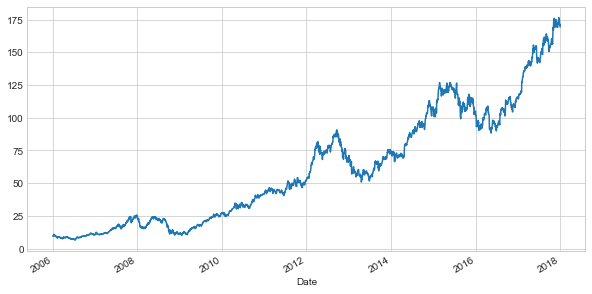

In [27]:
data.plot(figsize=(10, 5));

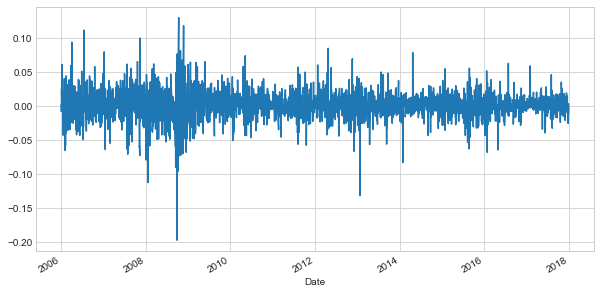

In [28]:
log_returns.plot(figsize = (10, 5))

# Calculations

* u - the mean value of the log returns
* var - the variance to the log returns
* std - standard deviation of the log returns

In [29]:
u = log_returns.mean()
var = log_returns.var()
stdev = log_returns.std()

Calculate the drift, using the following formula: drift = u - 0.5 * var

In [30]:
drift = u - (0.5 * var)
drift

0.0007418527824497464

# Forecasting Future Stock Prices

* Use “.values” to transform the drift and the stdev objects into arrays
* Forecast future stock prices for every trading day a year ahead (assign 252 to “t_intervals”)
* Examine 10 possible outcomes (assign 10 to “iterations”)

In [31]:
t_intervals = 252
iterations = 10

Using the below formula to calculate daily returns:
* daily returns = e(drift + stdev * Z)
* Z = norm.ppf(np.random.rand(t_intervals, iterations))

In [32]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[ 0.96934145,  0.99870719,  1.02165291, ...,  1.02966144,
         1.02439123,  1.01911003],
       [ 1.03665018,  0.9835058 ,  1.00635904, ...,  0.99304429,
         1.02326423,  0.96276558],
       [ 1.00064899,  1.02563976,  0.99206069, ...,  0.98402991,
         0.99132964,  0.98706527],
       ..., 
       [ 1.03229046,  1.00945055,  0.9595599 , ...,  0.97825055,
         1.00752395,  0.97789656],
       [ 0.94800811,  1.01332736,  1.01612623, ...,  1.02687769,
         0.97593764,  0.99754685],
       [ 1.02515645,  1.01636783,  0.99283887, ...,  0.99918861,
         1.0038942 ,  1.00065536]])

* S0 - the last adjusted closing price of Apple
* price_list - the same dimension as the daily_returns matrix
* Set the values on the first row of the price_list array equal to S0

In [33]:
S0 = data.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

array([[ 169.23,  169.23,  169.23, ...,  169.23,  169.23,  169.23],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       ..., 
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]])

Create a loop in the range (1 to t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t

In [34]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

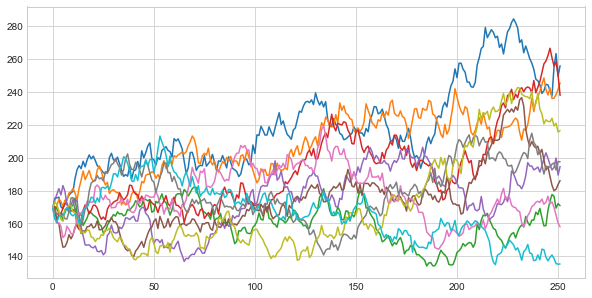

In [35]:
plt.figure(figsize=(10,5))
plt.plot(price_list)